# Iris dataset: A comparison between a Decision Tree and a Simple NN

In this notebook I will cover a simple comparison of classification models using the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The first model that I will use is the [scikit-learn](http://scikit-learn.org/stable/modules/tree.html)'s Decision Tree, and for the second one a simple neural network using the Sequential model from [Keras](https://keras.io).

In [1]:
import sys
sys.version

'3.5.3 |Continuum Analytics, Inc.| (default, Mar  6 2017, 12:15:08) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

## 1. Decision Tree


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

# Load data and set random seed:
iris = load_iris()
np.random.seed(8)
test_idx = np.random.choice(len(iris.data), int(len(iris.data)*.1))
print("Testing indices:", test_idx)

# Create training data:
train_data = np.delete(iris.data, test_idx, axis=0)
train_target = np.delete(iris.target, test_idx)

# Create testing data:
test_data = iris.data[test_idx]
test_target = iris.target[test_idx]

# Build classifier:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

# Predict data:
prediction = clf.predict(test_data)
print("Predictions: \t", prediction)

# Compare with labels:
print("Testing labels: ", test_target)
acc_sc = accuracy_score(test_target, prediction)
print("Accuracy score: {}%".format(acc_sc*100))

Testing indices: [ 84 105 133 136  83 104  48 109  85  60 115 108  13 137  61]
Predictions: 	 [1 2 2 2 2 2 0 2 1 1 2 2 0 2 1]
Testing labels:  [1 2 2 2 1 2 0 2 1 1 2 2 0 2 1]
Accuracy score: 93.33333333333333%


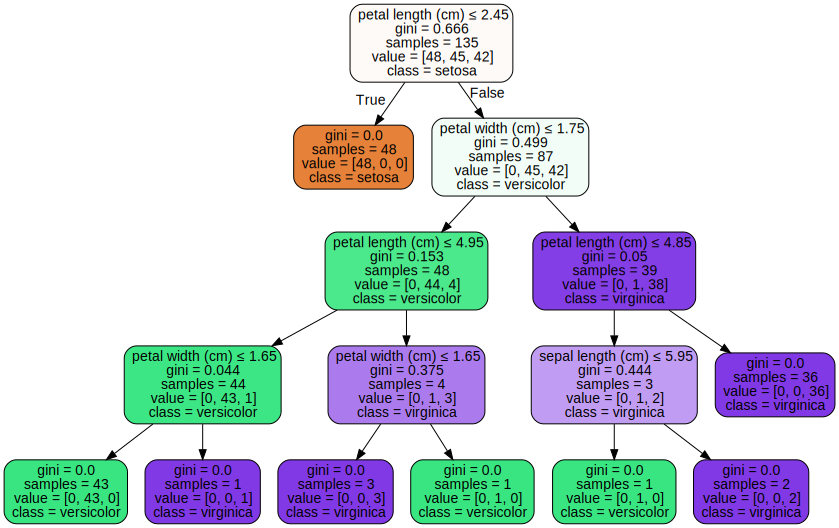

In [3]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 2. NN

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_target_ohe = one_hot_encode_object_array(train_target)
test_target_ohe = one_hot_encode_object_array(test_target)


# Build model:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

# Compile and train model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(train_data, train_target_ohe, epochs=100, batch_size=1, verbose=0)


Using TensorFlow backend.


In [5]:
loss, accuracy = model.evaluate(test_data, test_target_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))


Accuracy = 0.87


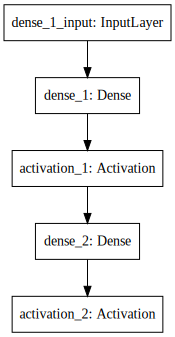

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))